In [1]:
import os
import math
import requests
import numpy as np
import credentials
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from questrade import QuestradeBot

# Personal Inputs

In [2]:
ACCOUNT_NUM = credentials.QUESTRADE_ACCOUNT_NUM
QUESTRADE_TOKEN = credentials.QUESTRADE_API_CODE

# QuestradeBot Initialization

In [3]:
qbot = QuestradeBot(QUESTRADE_TOKEN, ACCOUNT_NUM)

# Account Balance

In [4]:
balance = qbot.get_balance()
balance

{'perCurrencyBalances': [{'currency': 'CAD', 'cash': 31785.3365, 'marketValue': 0, 'totalEquity': 31785.3365, 'buyingPower': 31785.3365, 'maintenanceExcess': 31785.3365, 'isRealTime': True}, {'currency': 'USD', 'cash': 21729.9515, 'marketValue': 10448.56, 'totalEquity': 32178.5115, 'buyingPower': 21729.9515, 'maintenanceExcess': 21729.9515, 'isRealTime': True}], 'combinedBalances': [{'currency': 'CAD', 'cash': 59366.077441, 'marketValue': 13261.83478, 'totalEquity': 72627.912221, 'buyingPower': 58759.166272, 'maintenanceExcess': 58759.166272, 'isRealTime': True}, {'currency': 'USD', 'cash': 46772.56446, 'marketValue': 10448.56, 'totalEquity': 57221.12446, 'buyingPower': 46221.504518, 'maintenanceExcess': 46221.504518, 'isRealTime': True}], 'sodPerCurrencyBalances': [{'currency': 'CAD', 'cash': 31785.3365, 'marketValue': 0, 'totalEquity': 31785.3365, 'buyingPower': 31785.3365, 'maintenanceExcess': 31785.3365, 'isRealTime': True}, {'currency': 'USD', 'cash': 21729.9515, 'marketValue': 10

,Cash,Market_Value,Total_Equity,Cash (%),Investment (%)
Currency,,,,,
CAD,31785.3365,0.00,31785.3365,100.00,0.00
USD,21729.9515,10448.56,32178.5115,67.53,32.47


# Portfolio Holdings

In [5]:
portfolio = qbot.get_investment_summary()
portfolio

{'perCurrencyBalances': [{'currency': 'CAD', 'cash': 31785.3365, 'marketValue': 0, 'totalEquity': 31785.3365, 'buyingPower': 31785.3365, 'maintenanceExcess': 31785.3365, 'isRealTime': True}, {'currency': 'USD', 'cash': 21729.9515, 'marketValue': 10448.56, 'totalEquity': 32178.5115, 'buyingPower': 21729.9515, 'maintenanceExcess': 21729.9515, 'isRealTime': True}], 'combinedBalances': [{'currency': 'CAD', 'cash': 59366.077441, 'marketValue': 13261.83478, 'totalEquity': 72627.912221, 'buyingPower': 58759.166272, 'maintenanceExcess': 58759.166272, 'isRealTime': True}, {'currency': 'USD', 'cash': 46772.56446, 'marketValue': 10448.56, 'totalEquity': 57221.12446, 'buyingPower': 46221.504518, 'maintenanceExcess': 46221.504518, 'isRealTime': True}], 'sodPerCurrencyBalances': [{'currency': 'CAD', 'cash': 31785.3365, 'marketValue': 0, 'totalEquity': 31785.3365, 'buyingPower': 31785.3365, 'maintenanceExcess': 31785.3365, 'isRealTime': True}, {'currency': 'USD', 'cash': 21729.9515, 'marketValue': 10

,Description,Currency,Quantities,Market Value,Return (%),Portfolio (%)
MMM,3M COMPANY,USD,3,552.57,-6.45,5.29
O,REALTY INCOME CORP,USD,75,5134.50,11.86,49.14
JPM,JPMORGAN CHASE & CO.,USD,6,948.96,3.06,9.08
VTI,VANGUARD INDEX FUNDS VANGUARD TOTAL STOCK MARK...,USD,3,693.30,18.10,6.64
QQQ,INVESCO QQQ TRUST UNIT SER 1,USD,2,756.10,18.26,7.24
GLD,SPDR GOLD TRUST GOLD SHARES NPV,USD,7,1174.81,-3.71,11.24
TLT,ISHARES TRUST BARCLAYS 20+ TREAS BD FD TO 07/0...,USD,4,602.32,-0.72,5.76
IEF,ISHARES TRUST BARCLAYS 7-10 YEAR TREASURY BOND...,USD,5,586.00,-1.21,5.61


<AxesSubplot:title={'center':'Portfolio Breakdown'}, ylabel='Portfolio (%)'>

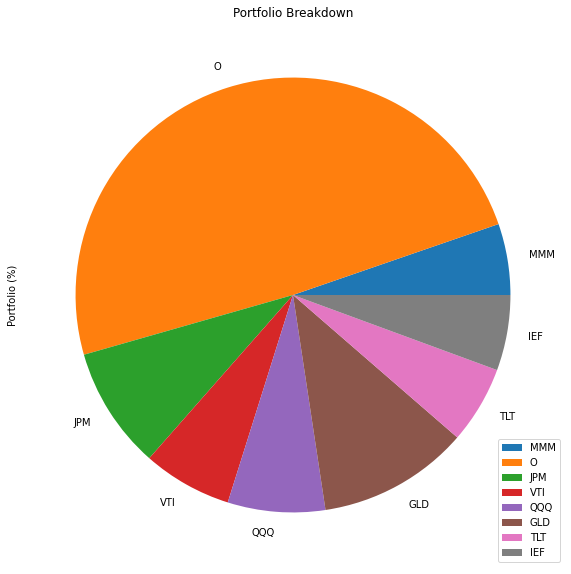

In [6]:
portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

# Monthly Dividend Income

In [7]:
div = qbot.get_dividend_income()
div.loc['Total'] = div.sum(numeric_only=True, axis=0)

<AxesSubplot:title={'center':'Monthly Dividend Payments'}, xlabel='Months', ylabel='Dividend ($)'>

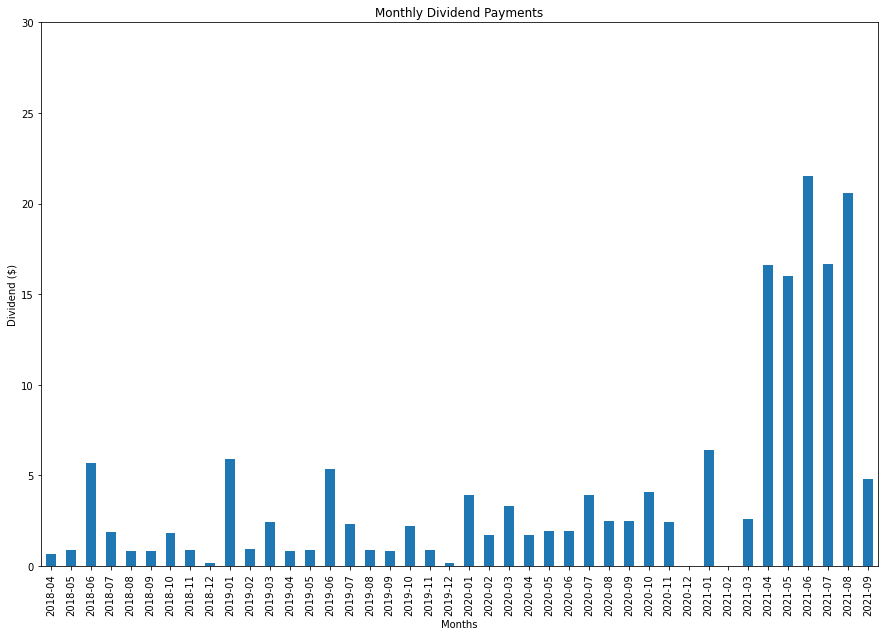

In [8]:
div[:-1].plot(kind='bar',
                    title='Monthly Dividend Payments',
                    xlabel='Months',
                    ylabel='Dividend ($)',
                    figsize=(15, 10),
                    legend=False,
                    ylim=(0, 30))

# Performance Against Benchmark